# Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'matplotlib'

# Load Dataset

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Create Plots

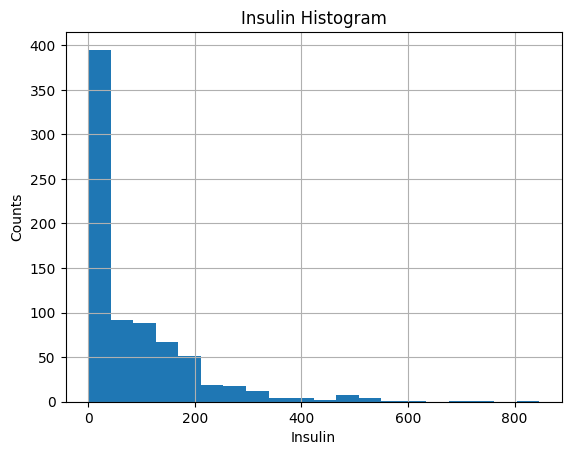

In [ ]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

# Convert DataFrame to Numpy arrays

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

Train Samples: 691
Test Samples: 77

In [ ]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((691, 8), (691,), (77, 8), (77,))

# Create a Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test set

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 87.01


# Visualizing Coefficients

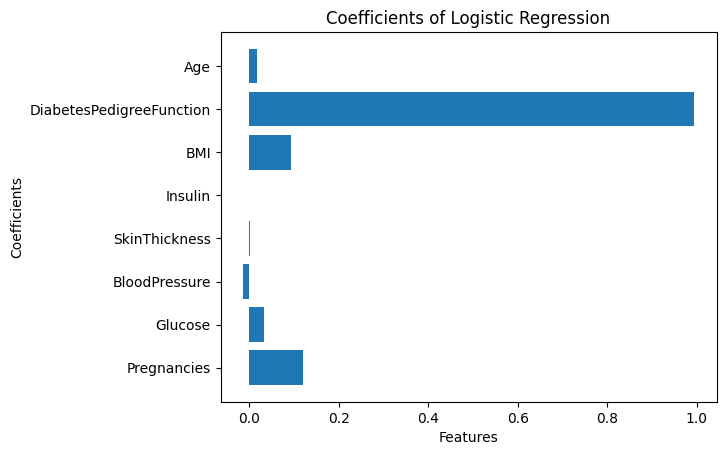

In [ ]:
features = input_df.columns
coefficients = model.coef_[0]

plt.barh(input_df.columns, coefficients)
plt.title('Coefficients of Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

# Feature Importance

The larger the absolute weight value, the better

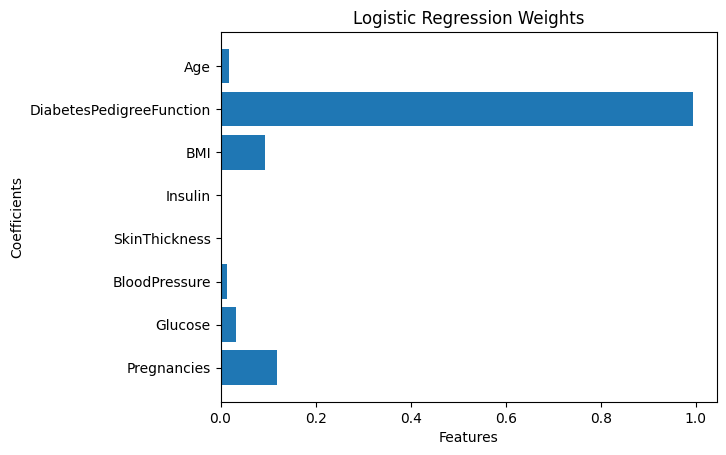

In [ ]:
plt.barh(input_df.columns, np.abs(coefficients))
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()